In [28]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt
import time

In [29]:
device = torch.device("cpu")
print('Device ', device)

Device  cpu


In [30]:
class SimpleDataset(Dataset):
    def __init__(self, input_data, output_data):
        self.input_data = input_data
        self.output_data = output_data

    def __len__(self):
        return len(self.input_data)

    def __getitem__(self, idx):
        return {"input": self.input_data[idx], "output": self.output_data[idx]}


class SimpleModel(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_dim):
        super(SimpleModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, output_dim)
        self.act = nn.ReLU()

    def forward(self, x):
        x = self.act(self.fc1(x))
        x = self.act(self.fc2(x))
        x = self.fc3(x)
        return x

In [31]:
class SimpleModelTrainer:
    def __init__(
        self,
        model,
        train_dataset,
        optimizer,
        loss_fn,
        batch_size,
        max_epoch=100,
    ):
        self.model = model  # self.model points to first_model
        self.train_dataloader = DataLoader(
            train_dataset, batch_size=batch_size, shuffle=True
        )
        self.optimizer = optimizer
        self.loss_fn = loss_fn
        self.max_epoch = max_epoch

    def train(self):
        for _ in range(1, self.max_epoch):
            for data in self.train_dataloader:
                inp, out = data["input"], data["output"]
                pred = self.model(inp)
                self.optimizer.zero_grad()
                loss = self.loss_fn(pred, out)
                loss.backward()
                self.optimizer.step()


first_model = SimpleModel(1, 1, 32).to(device)
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(
    first_model.parameters(), lr=1e-4
)  # optimizer gets the reference to first_model

x = np.linspace(0, 100, 10000).reshape(10000, 1).astype(np.float32)
random_ones = np.random.choice([-1, 1], size=10000).reshape(10000, 1).astype(np.float32)
y = np.sqrt(x)*random_ones
# y = np.sqrt(x)

x = torch.from_numpy(x).to(device)
y = torch.from_numpy(y).to(device)

train_data = SimpleDataset(x, y)

trainer = SimpleModelTrainer(
    first_model, train_data, optimizer, loss_fn, 1024, max_epoch=1000
)
start_time = time.time()
trainer.train()
print("Time taken to train ", time.time() - start_time)

Time taken to train  32.44774508476257


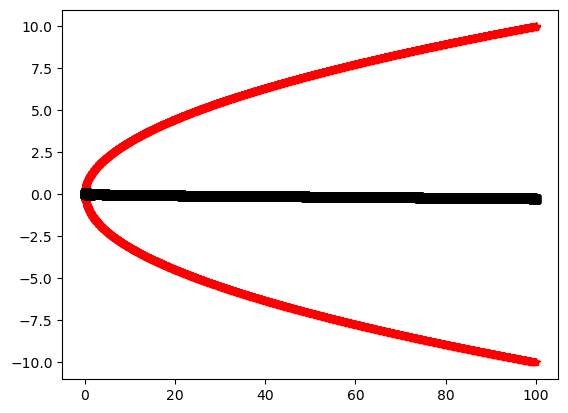

In [ ]:
y_pred = trainer.model.forward(x).detach().numpy()
plt.plot(x, y, "r*")
plt.plot(x, y_pred, "ks")

In [38]:
class SimpleModelTrainer:
    def __init__(
        self,
        model,
        train_dataset,
        optimizer,
        loss_fn,
        batch_size,
        max_epoch=100,
    ):
        self.model = model  # self.model points to first_model
        self.train_dataloader = DataLoader(
            train_dataset, batch_size=batch_size, shuffle=True
        )
        self.optimizer = optimizer
        self.loss_fn = loss_fn
        self.max_epoch = max_epoch

    def train(self):
        for _ in range(1, self.max_epoch):
            for data in self.train_dataloader:
                inp, out = data["input"], data["output"]
                pred = self.model(inp)
                self.optimizer.zero_grad()
                loss = self.loss_fn(pred**2, out)
                loss.backward()
                self.optimizer.step()


first_model = SimpleModel(1, 1, 32).to(device)
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(
    first_model.parameters(), lr=1e-4
)  # optimizer gets the reference to first_model

x = np.linspace(0, 100, 10000).reshape(10000, 1).astype(np.float32)
random_ones = np.random.choice([-1, 1], size=10000).reshape(10000, 1).astype(np.float32)
y = np.sqrt(x)*random_ones
# y = np.sqrt(x)

x = torch.from_numpy(x).to(device)
y = torch.from_numpy(y).to(device)

train_data = SimpleDataset(x, x)

trainer = SimpleModelTrainer(
    first_model, train_data, optimizer, loss_fn, 1024, max_epoch=1000
)
start_time = time.time()
trainer.train()
print("Time taken to train ", time.time() - start_time)

Time taken to train  29.117624759674072


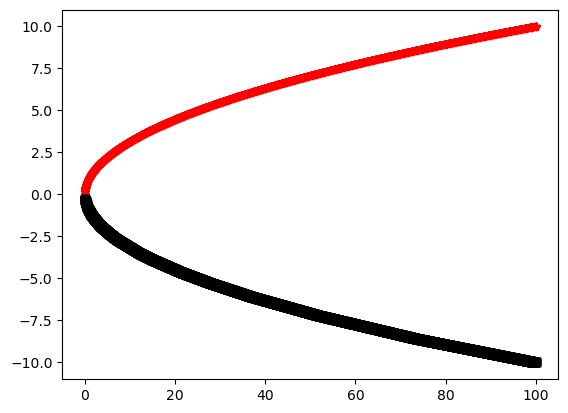

In [37]:
y_pred = trainer.model.forward(x).detach().numpy()
plt.plot(x, y, "r*")
plt.plot(x, y_pred, "ks")